In [5]:
# 期望位置
import numpy as np
import matplotlib.pyplot as plt

dt = 0.001
t_sum = 100
t = np.arange(0, t_sum, dt)

# 轨迹1
# x_d = t
# y_d = np.sin(0.5 * t) + 0.5 * t + 1
# dot_x_d = 1 * np.ones_like(t)
# dot_y_d = 0.5 * np.cos(0.5 * t) + 0.5

# 轨迹2
# A = 1
# T = 20
# x_d = A * np.sin(2 * np.pi / T * t)
# y_d = t
# dot_x_d = 2 * np.pi / T * A * np.cos(2 * np.pi / T * t)
# dot_y_d = 1 * np.ones_like(t)

# 轨迹3
A = 1
T = 20
x_d = A * np.sin(2 * np.pi / T * t)
y_d = - A * np.cos(2 * np.pi / T * t)
dot_x_d = 2 * np.pi / T * A * np.cos(2 * np.pi / T * t)
dot_y_d = 2 * np.pi / T * A * np.sin(2 * np.pi / T * t)

# 初值
x = 0
y = 0
theta = 0
hat_theta_d = 0
dot_hat_theta_d = 0

# 控制参数
k_1 = 0.5
k_2 = 0.5
k_3 = 0.5
R = 100
xites = 0.95

# 历史变量
x_history = []
y_history = []
theta_history = []
theta_d_history = []
v_history = []
omega_history = []

for i in range(len(t)):
    # 更新控制律
    u_1 = dot_x_d[i] + k_1 * (x_d[i] - x)
    u_2 = dot_y_d[i] + k_2 * (y_d[i] - y)
    theta_d = np.arctan2(u_2, u_1)
    if i == 0:
        theta_d1 = theta_d 
        k = 0
    # -------------------------------保证theta_d在0和2 * pi之间---------------------------------------
    delta = - 0.8 * np.pi ** 2
    if theta_d * theta_d1 < delta:
        if theta_d < 0:
            k = k + 1
        else:
            k = k - 1
    theta_d1 = theta_d
    theta_d = theta_d + 2 * np.pi * k
    # -------------------------------保证theta_d在0和2 * pi之间---------------------------------------

    theta_d_history.append(theta_d)
    v = np.sqrt(u_1**2 + u_2**2)
    v_history.append(v)
    ddot_hat_theta_d = - R**2 * (hat_theta_d - theta_d) - 2 * R * dot_hat_theta_d        # 线性二阶微分器
    dot_hat_theta_d = dot_hat_theta_d + ddot_hat_theta_d * dt
    hat_theta_d = hat_theta_d + dot_hat_theta_d * dt
    
    omega = dot_hat_theta_d + k_3 * (theta_d - theta)      # 暂时不加上饱和函数
    # --------------------------------加上饱和函数-----------------------------------------
    # de = 0.1
    # kk = 1/de
    # if np.abs(theta_d - theta)>de:
    #     sats = np.sign(theta_d - theta)
    # else:
    #     sats = kk * (theta_d - theta)
    # omega = dot_hat_theta_d + k_3 * (theta_d - theta) + xites * sats      # 加上饱和函数
    # --------------------------------加上饱和函数-----------------------------------------

    omega_history.append(omega)
    # 更新状态
    dot_x = v * np.cos(theta)
    dot_y = v * np.sin(theta)
    dot_theta = omega

    x = x + dot_x * dt
    y = y + dot_y * dt
    theta = theta + dot_theta * dt
    x_history.append(x)
    y_history.append(y)
    theta_history.append(theta)
    


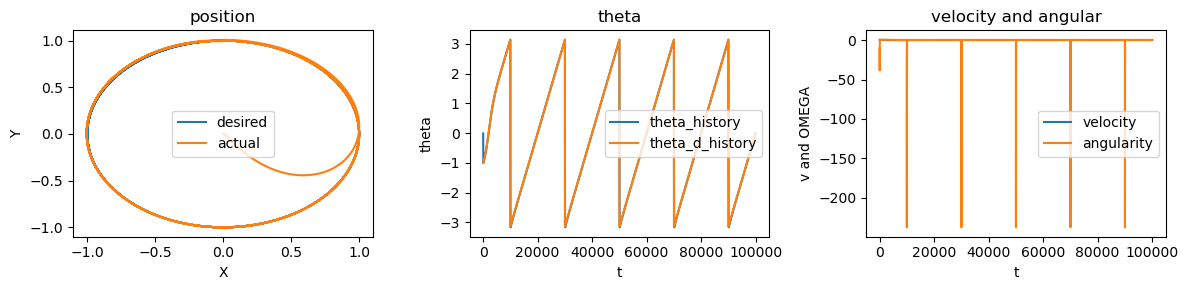

In [6]:
# 绘制轨迹和速度向量
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.plot(x_d, y_d, label='desired')
plt.plot(x_history, y_history, label='actual')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('position')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(theta_history, label='theta_history')
plt.plot(theta_d_history, label='theta_d_history')
plt.xlabel('t')
plt.ylabel('theta')
plt.title('theta')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(v_history, label='velocity')
plt.plot(omega_history, label='angularity')
plt.xlabel('t')
plt.ylabel('v and OMEGA')
plt.title('velocity and angular')
plt.legend()

plt.tight_layout()
plt.show()

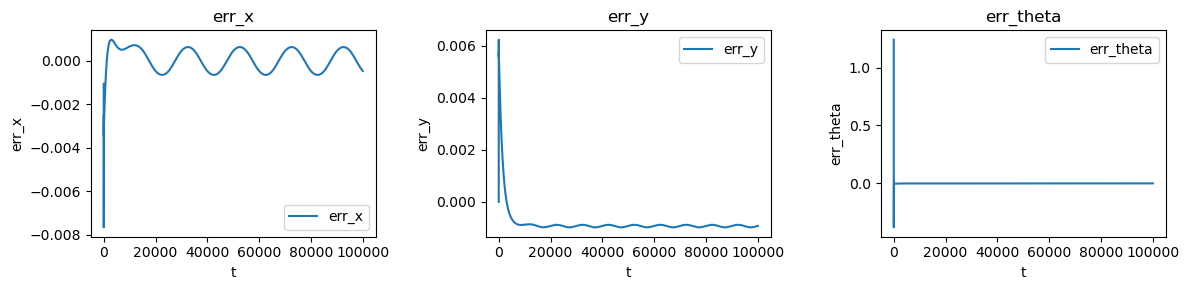

In [18]:
# 绘制误差
err_x = []
err_y = []
err_theta = []
for i in range(len(x_history)):
    err_x.append(x_d[i]-x_history[i])
    err_y.append(y_d[i]-y_history[i])
    err_theta.append(theta_d_history[i]-theta_history[i])

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.plot(err_x, label='err_x')
plt.xlabel('t')
plt.ylabel('err_x')
plt.title('err_x')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(err_y, label='err_y')
plt.xlabel('t')
plt.ylabel('err_y')
plt.title('err_y')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(err_theta, label='err_theta')
plt.xlabel('t')
plt.ylabel('err_theta')
plt.title('err_theta')
plt.legend()

plt.tight_layout()
plt.show()